In [2]:
files = list.files('raw')
files

[1] "barcodes.tsv.gz"                               
 [2] "features.tsv.gz"                               
 [3] "GSE130116_barcodes.tsv.gz"                     
 [4] "GSE130116_features.tsv.gz"                     
 [5] "GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz" 
 [6] "GSM3732337_ETV001_NYU_RELAPSE.matrix.mtx.gz"   
 [7] "GSM3732338_ETV002_COG_DIAGNOSIS.matrix.mtx.gz" 
 [8] "GSM3732339_ETV002_COG_RELAPSE.matrix.mtx.gz"   
 [9] "GSM3732340_ETV002_COG_REMISSION.matrix.mtx.gz" 
[10] "GSM3732341_ETV003_SJ_DIAGNOSIS.matrix.mtx.gz"  
[11] "GSM3732342_ETV003_SJ_RELAPSE.matrix.mtx.gz"    
[12] "GSM3732343_ETV003_SJ_REMISSION.matrix.mtx.gz"  
[13] "GSM3732344_ETV004_COG_DIAGNOSIS.matrix.mtx.gz" 
[14] "GSM3732345_ETV004_COG_RELAPSE.matrix.mtx.gz"   
[15] "GSM3732346_ETV004_COG_REMISSION.matrix.mtx.gz" 
[16] "GSM3732347_ETV005_COG_DIAGNOSIS.matrix.mtx.gz" 
[17] "GSM3732348_ETV005_COG_RELAPSE.matrix.mtx.gz"   
[18] "GSM3732349_ETV005_COG_REMISSION.matrix.mtx.gz" 
[19] "GSM3732350_HEALTHY001_LONZA_CD45.matrix.mtx.gz"
[20] "GSM3732351_HEALTHY002_WC4_CD45.matrix.mtx.gz"  
[21] "GSM3732352_HEALTHY003_SC_CD45.matrix.mtx.gz"   
[22] "GSM3732353_HEALTHY004_SC_CD45.matrix.mtx.gz"   
[23] "GSM3732354_PH001_COG_DIAGNOSIS.matrix.mtx.gz"  
[24] "GSM3732355_PH001_COG_RELAPSE.matrix.mtx.gz"    
[25] "GSM3732356_PH001_COG_REMISSION.matrix.mtx.gz"  
[26] "GSM3732357_PH002_SJ_DIAGNOSIS.matrix.mtx.gz"   
[27] "GSM3732358_PH002_SJ_RELAPSE.matrix.mtx.gz"     
[28] "GSM3732359_PH002_SJ_REMISSION.matrix.mtx.gz"   
[29] "GSM4642793_ETV003.barcodes.tsv.gz"             
[30] "GSM4642793_ETV003.features.tsv.gz"             
[31] "GSM4642793_ETV003.matrix.mtx.gz"               
[32] "GSM4642794_MLL001.barcodes.tsv.gz"             
[33] "GSM4642794_MLL001.features.tsv.gz"             
[34] "GSM4642794_MLL001.matrix.mtx.gz"               
[35] "GSM4642795_PH002.barcodes.tsv.gz"              
[36] "GSM4642795_PH002.features.tsv.gz"              
[37] "GSM4642795_PH002.matrix.mtx.gz"                
[38] "GSM4642796_PH003.barcodes.tsv.gz"              
[39] "GSM4642796_PH003.features.tsv.gz"              
[40] "GSM4642796_PH003.matrix.mtx.gz"                
[41] "matrix.mtx.gz"

In [3]:
files = files[grep(x = files, pattern = 'GSM373*')]
files

[1] "GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz" 
 [2] "GSM3732337_ETV001_NYU_RELAPSE.matrix.mtx.gz"   
 [3] "GSM3732338_ETV002_COG_DIAGNOSIS.matrix.mtx.gz" 
 [4] "GSM3732339_ETV002_COG_RELAPSE.matrix.mtx.gz"   
 [5] "GSM3732340_ETV002_COG_REMISSION.matrix.mtx.gz" 
 [6] "GSM3732341_ETV003_SJ_DIAGNOSIS.matrix.mtx.gz"  
 [7] "GSM3732342_ETV003_SJ_RELAPSE.matrix.mtx.gz"    
 [8] "GSM3732343_ETV003_SJ_REMISSION.matrix.mtx.gz"  
 [9] "GSM3732344_ETV004_COG_DIAGNOSIS.matrix.mtx.gz" 
[10] "GSM3732345_ETV004_COG_RELAPSE.matrix.mtx.gz"   
[11] "GSM3732346_ETV004_COG_REMISSION.matrix.mtx.gz" 
[12] "GSM3732347_ETV005_COG_DIAGNOSIS.matrix.mtx.gz" 
[13] "GSM3732348_ETV005_COG_RELAPSE.matrix.mtx.gz"   
[14] "GSM3732349_ETV005_COG_REMISSION.matrix.mtx.gz" 
[15] "GSM3732350_HEALTHY001_LONZA_CD45.matrix.mtx.gz"
[16] "GSM3732351_HEALTHY002_WC4_CD45.matrix.mtx.gz"  
[17] "GSM3732352_HEALTHY003_SC_CD45.matrix.mtx.gz"   
[18] "GSM3732353_HEALTHY004_SC_CD45.matrix.mtx.gz"   
[19] "GSM3732354_PH001_COG_DIAGNOSIS.matrix.mtx.gz"  
[20] "GSM3732355_PH001_COG_RELAPSE.matrix.mtx.gz"    
[21] "GSM3732356_PH001_COG_REMISSION.matrix.mtx.gz"  
[22] "GSM3732357_PH002_SJ_DIAGNOSIS.matrix.mtx.gz"   
[23] "GSM3732358_PH002_SJ_RELAPSE.matrix.mtx.gz"     
[24] "GSM3732359_PH002_SJ_REMISSION.matrix.mtx.gz"

In [4]:
library(Seurat)
curr = files[1]

file.copy('raw/GSE130116_barcodes.tsv.gz', 'raw/barcodes.tsv.gz', overwrite = TRUE)
file.copy('raw/GSE130116_features.tsv.gz', 'raw/features.tsv.gz', overwrite = TRUE)

message(curr)
i = 1

for (curr in files) {
    message(curr)
file.copy(paste0('raw/', curr), 'raw/matrix.mtx.gz', overwrite = TRUE)

vec = 'raw'
names(vec) = curr
dat = Read10X(data.dir = vec)
dat = dat[,colSums(dat) > 200]
message(ncol(dat))
if (i == 1) {
    all = dat
} else {
    all = cbind(all, dat)
}

i = i + 1
    }

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




[1] TRUE

[1] TRUE

GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz

GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz

9408

GSM3732337_ETV001_NYU_RELAPSE.matrix.mtx.gz

8317

GSM3732338_ETV002_COG_DIAGNOSIS.matrix.mtx.gz

5377

GSM3732339_ETV002_COG_RELAPSE.matrix.mtx.gz

8186

GSM3732340_ETV002_COG_REMISSION.matrix.mtx.gz

7247

GSM3732341_ETV003_SJ_DIAGNOSIS.matrix.mtx.gz

6018

GSM3732342_ETV003_SJ_RELAPSE.matrix.mtx.gz

5927

GSM3732343_ETV003_SJ_REMISSION.matrix.mtx.gz

31119

GSM3732344_ETV004_COG_DIAGNOSIS.matrix.mtx.gz

9750

GSM3732345_ETV004_COG_RELAPSE.matrix.mtx.gz

4942

GSM3732346_ETV004_COG_REMISSION.matrix.mtx.gz

6656

GSM3732347_ETV005_COG_DIAGNOSIS.matrix.mtx.gz

8271

GSM3732348_ETV005_COG_RELAPSE.matrix.mtx.gz

5579

GSM3732349_ETV005_COG_REMISSION.matrix.mtx.gz

4767

GSM3732350_HEALTHY001_LONZA_CD45.matrix.mtx.gz

6224

GSM3732351_HEALTHY002_WC4_CD45.matrix.mtx.gz

4979

GSM3732352_HEALTHY003_SC_CD45.matrix.mtx.gz

6456

GSM3732353_HEALTHY004_SC_CD45.matrix.mtx.gz

7363

GSM3732354_PH00

In [5]:
seurat = CreateSeuratObject(all)

In [6]:
seurat = subset(seurat, cells =colnames(seurat)[seurat@meta.data$nFeature_RNA > 500])

In [7]:
seurat = NormalizeData(seurat)
seurat = FindVariableFeatures(seurat)

Normalizing layer: counts

Finding variable features for layer counts



In [8]:
seurat = ScaleData(seurat)
seurat = RunPCA(seurat)
seurat = FindNeighbors(seurat)


Centering and scaling data matrix

PC_ 1 
Positive:  STMN1, PCLAF, TUBA1B, TUBB, TYMS, HMGB2, HIST1H4C, NUSAP1, MKI67, UHRF1 
	   TK1, PCNA, CKS1B, DUT, H1F0, CENPF, CENPU, TOP2A, CDT1, BIRC5 
	   PRDX1, MCM7, CKS2, DHFR, TPX2, ZWINT, HMGB1, H2AFZ, UBE2T, SMC2 
Negative:  IL32, TRBC1, CD8B, CCL5, S100A10, KLRB1, DUSP2, CTSW, CD8A, CST7 
	   GNLY, KLRD1, GZMA, LINC02446, GPR183, ANXA1, COTL1, NKG7, NR4A2, FGFBP2 
	   SRGN, GZMH, LTB, AC103591.3, PRF1, SOCS3, FKBP11, GZMB, TSHZ2, TRGC2 
PC_ 2 
Positive:  MME, CD24, TERF2, ARPP21, ERG, TCL1B, VPREB3, AL713998.1, RPS4Y2, CD79A 
	   MZB1, SLC35E3, EBF1, RAG1, SOCS2, TCL1A, TCF4, MDK, AKAP12, CD79B 
	   SSBP2, JUP, HPS4, DNTT, CMTM8, ZCCHC7, LINC01013, TMED6, LINC00958, IGF2BP1 
Negative:  S100A6, S100A4, BLVRB, LYZ, S100A9, FCN1, TYROBP, CST3, S100A8, CD36 
	   LGALS1, LGALS3, CSTA, S100A11, FCER1G, MNDA, VCAN, CFD, AC020656.1, SERPINA1 
	   TYMP, FTL, SRGN, S100A12, AHSP, COTL1, CLEC7A, MS4A6A, PSAP, S100A10 
PC_ 3 
Positive:  LST1, CST3, 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:54:27 UMAP embedding parameters a = 0.9922 b = 1.112

13:54:27 Read 131354 rows and found 40 numeric columns

13:54:27 Using Annoy for neighbor search, n_neighbors = 30

13:54:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:54:44 Writing NN index file to temp file /tmp/RtmpfDUb7i/file2cf2f852639bd8

13:54:44 Searching Annoy index using 1 thread, search_k = 3000

13:55:37 Annoy recall = 100%

13:55:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbo

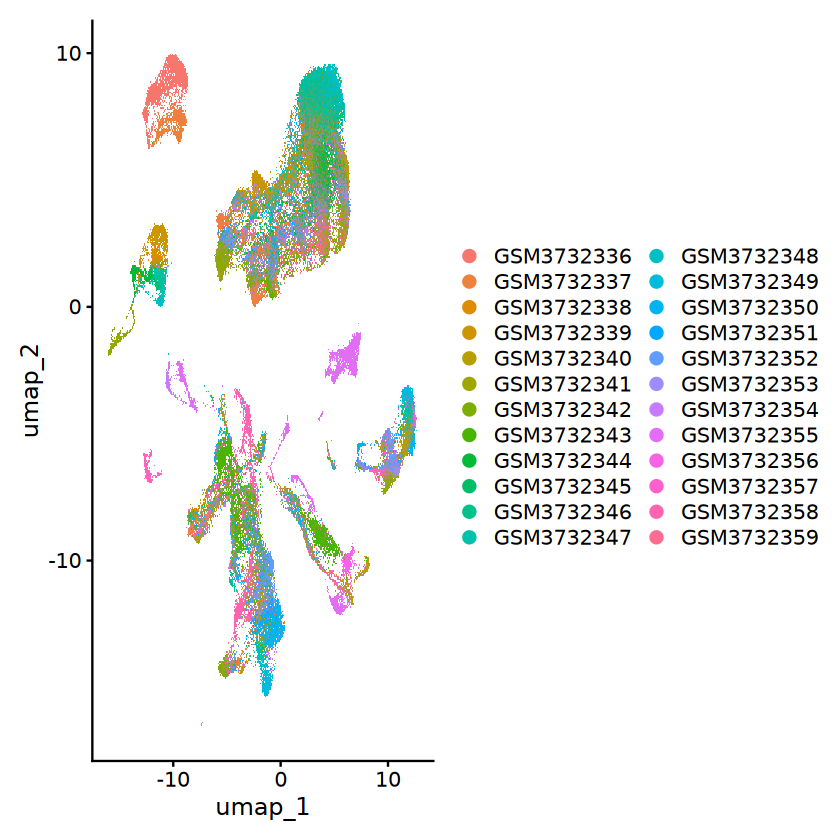

In [9]:
seurat = RunUMAP(seurat, dims = 1:40)
DimPlot(seurat)

In [10]:
library(stringr)
seurat@meta.data$patient = sapply(colnames(seurat), function(x) str_split(x, '_')[[1]][2])
seurat@meta.data$loc = sapply(colnames(seurat), function(x) str_split(x, '_')[[1]][3])
seurat@meta.data$diag = sapply(colnames(seurat), function(x) str_split(x, '_')[[1]][4])
seurat@meta.data$id = paste(seurat@meta.data$patient, seurat@meta.data$diag, seurat@meta.data$loc, sep=  '_')
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,patient,loc,diag,id
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz_AAACCTGAGATGGGTC-1,GSM3732336,2800,1343,ETV001,NYU,DIAGNOSIS.matrix.mtx.gz,ETV001_DIAGNOSIS.matrix.mtx.gz_NYU
GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz_AAACCTGAGGCTCATT-1,GSM3732336,8914,3290,ETV001,NYU,DIAGNOSIS.matrix.mtx.gz,ETV001_DIAGNOSIS.matrix.mtx.gz_NYU
GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz_AAACCTGAGGTGCTTT-1,GSM3732336,2488,992,ETV001,NYU,DIAGNOSIS.matrix.mtx.gz,ETV001_DIAGNOSIS.matrix.mtx.gz_NYU
GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz_AAACCTGAGTGTTAGA-1,GSM3732336,3412,1025,ETV001,NYU,DIAGNOSIS.matrix.mtx.gz,ETV001_DIAGNOSIS.matrix.mtx.gz_NYU
GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz_AAACCTGCAAGTTCTG-1,GSM3732336,5180,2307,ETV001,NYU,DIAGNOSIS.matrix.mtx.gz,ETV001_DIAGNOSIS.matrix.mtx.gz_NYU
GSM3732336_ETV001_NYU_DIAGNOSIS.matrix.mtx.gz_AAACCTGCAATCAGAA-1,GSM3732336,14986,4087,ETV001,NYU,DIAGNOSIS.matrix.mtx.gz,ETV001_DIAGNOSIS.matrix.mtx.gz_NYU


In [11]:
library(harmony)
harmonized_seurat = RunHarmony(seurat, group.by.vars = 'id', reduction = 'pca',
                              reduction.save = 'harmony')

Loading required package: Rcpp

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“did not converge in 25 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 6567700)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [12]:
harmonized_seurat <- RunUMAP(harmonized_seurat, reduction = "harmony", dims = 1:40)


14:01:52 UMAP embedding parameters a = 0.9922 b = 1.112

14:01:52 Read 131354 rows and found 40 numeric columns

14:01:52 Using Annoy for neighbor search, n_neighbors = 30

14:01:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:02:11 Writing NN index file to temp file /tmp/RtmpfDUb7i/file2cf2f852d04b05

14:02:11 Searching Annoy index using 1 thread, search_k = 3000

14:03:11 Annoy recall = 100%

14:03:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:03:18 Initializing from normalized Laplacian + noise (using RSpectra)

14:03:53 Commencing optimization for 200 epochs, with 6414752 positive edges

14:05:26 Optimization finished



In [13]:
harmonized_seurat = FindNeighbors(harmonized_seurat, dims = 1:30, reduction = 'harmony')
harmonized_seurat = FindClusters(harmonized_seurat, resolution = .2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 131354
Number of edges: 3872183

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9645
Number of communities: 30
Elapsed time: 54 seconds


16 singletons identified. 14 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



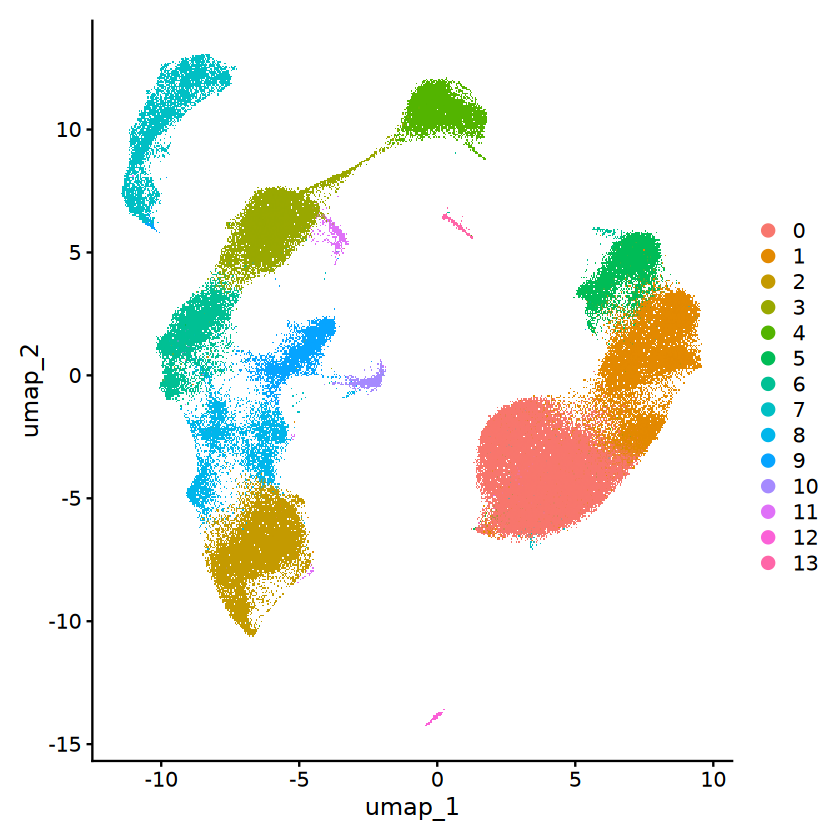

In [14]:
DimPlot(harmonized_seurat)

In [16]:
saveRDS(harmonized_seurat, 'harmony.RDS')